<a href="https://colab.research.google.com/github/KANIKA-2005-DSSV/Assignment-Sampling/blob/main/Assignment_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the DataFrame:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

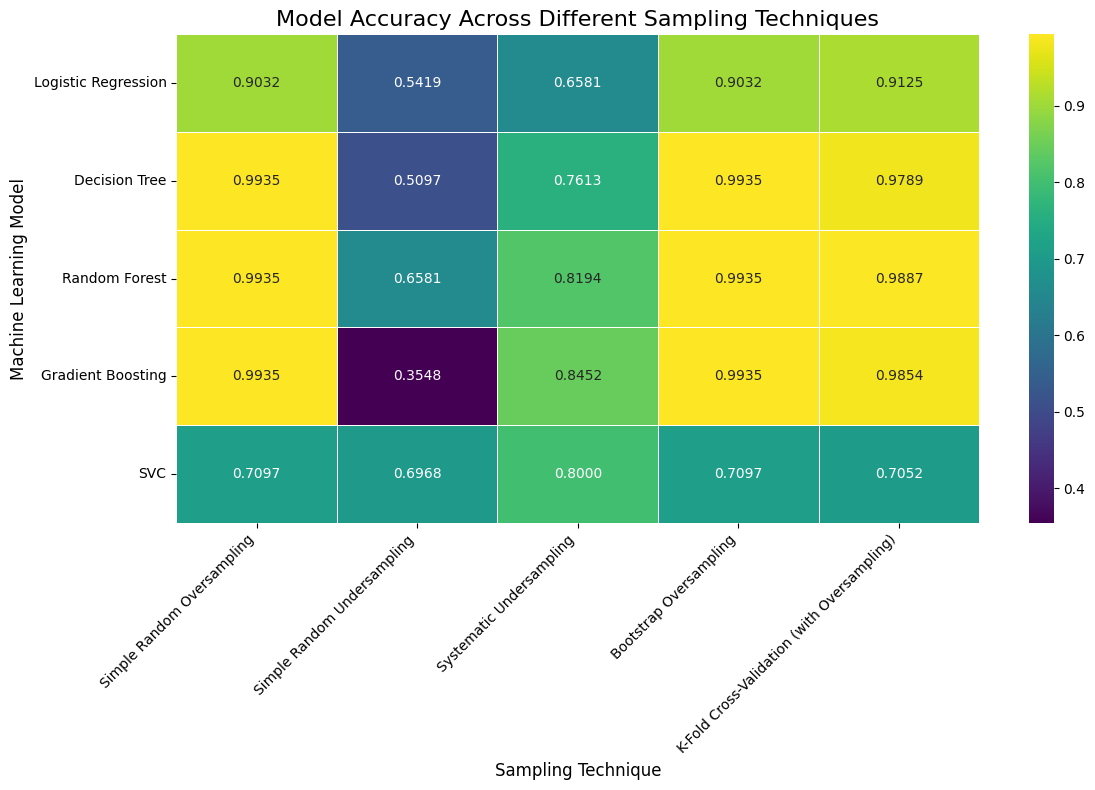


Heatmap displayed and saved successfully.

Final Table (with names):



,Random Oversampling,Random Undersampling,Systematic Sampling,Bootstrap Sampling,K-Fold Sampling
Logistic Regression,90.32,54.19,65.81,90.32,91.25
Decision Tree,99.35,50.97,76.13,99.35,97.89
Random Forest,99.35,65.81,81.94,99.35,98.87
Gradient Boosting,99.35,35.48,84.52,99.35,98.54
SVC,70.97,69.68,80.00,70.97,70.52



Summary of Findings:
The overall best performing combination achieved an accuracy of: 0.9935
This was achieved with the sampling technique: 'Simple Random Oversampling'
And the model: 'Decision Tree'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Creditcard_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nClass Distribution:")
print(df['Class'].value_counts())


X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


def get_class_counts(y):
    class_counts = y.value_counts()
    minority_class_label = class_counts.idxmin()
    majority_class_label = class_counts.idxmax()
    minority_count = class_counts.min()
    majority_count = class_counts.max()
    return minority_class_label, majority_class_label, minority_count, majority_count


def simple_random_oversampling(X, y, random_state=None):
    minority_class_label, majority_class_label, minority_count, majority_count = get_class_counts(y)

    X_minority = X[y == minority_class_label]
    y_minority = y[y == minority_class_label]
    X_majority = X[y == majority_class_label]
    y_majority = y[y == majority_class_label]


    X_oversampled_minority = X_minority.sample(n=majority_count, replace=True, random_state=random_state)
    y_oversampled_minority = y_minority.sample(n=majority_count, replace=True, random_state=random_state)

    X_resampled = pd.concat([X_majority, X_oversampled_minority])
    y_resampled = pd.concat([y_majority, y_oversampled_minority])

    return X_resampled, y_resampled

def simple_random_undersampling(X, y, random_state=None):
    minority_class_label, majority_class_label, minority_count, majority_count = get_class_counts(y)

    X_minority = X[y == minority_class_label]
    y_minority = y[y == minority_class_label]
    X_majority = X[y == majority_class_label]
    y_majority = y[y == majority_class_label]


    X_undersampled_majority = X_majority.sample(n=minority_count, replace=False, random_state=random_state)
    y_undersampled_majority = y_majority.sample(n=minority_count, replace=False, random_state=random_state)

    X_resampled = pd.concat([X_minority, X_undersampled_majority])
    y_resampled = pd.concat([y_minority, y_undersampled_majority])

    return X_resampled, y_resampled

def systematic_undersampling(X, y):
    minority_class_label, majority_class_label, minority_count, majority_count = get_class_counts(y)

    X_minority = X[y == minority_class_label]
    y_minority = y[y == minority_class_label]
    X_majority = X[y == majority_class_label]
    y_majority = y[y == majority_class_label]

    k = int(np.floor(majority_count / minority_count))
    X_undersampled_majority = X_majority.iloc[::k][:minority_count]
    y_undersampled_majority = y_majority.iloc[::k][:minority_count]

    X_resampled = pd.concat([X_minority, X_undersampled_majority])
    y_resampled = pd.concat([y_minority, y_undersampled_majority])

    return X_resampled, y_resampled

def bootstrap_oversampling(X, y, random_state=None):
    minority_class_label, majority_class_label, minority_count, majority_count = get_class_counts(y)

    X_minority = X[y == minority_class_label]
    y_minority = y[y == minority_class_label]
    X_majority = X[y == majority_class_label]
    y_majority = y[y == majority_class_label]


    needed_samples = majority_count - minority_count

    if needed_samples > 0:
        X_bootstrapped_minority = X_minority.sample(n=needed_samples, replace=True, random_state=random_state)
        y_bootstrapped_minority = y_minority.sample(n=needed_samples, replace=True, random_state=random_state)

        X_resampled = pd.concat([X_majority, X_minority, X_bootstrapped_minority])
        y_resampled = pd.concat([y_majority, y_minority, y_bootstrapped_minority])
    else:
        X_resampled = pd.concat([X_majority, X_minority])
        y_resampled = pd.concat([y_majority, y_minority])

    return X_resampled, y_resampled


models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True)
}

print("\nSampling functions and ML models defined successfully.")


accuracy_results = defaultdict(dict)

direct_sampling_techniques = [
    (simple_random_oversampling, 'Simple Random Oversampling'),
    (simple_random_undersampling, 'Simple Random Undersampling'),
    (systematic_undersampling, 'Systematic Undersampling'),
    (bootstrap_oversampling, 'Bootstrap Oversampling')
]


for sampler_func, sampler_name in direct_sampling_techniques:
    print(f"\nApplying {sampler_name}...")

    if sampler_name == 'Systematic Undersampling':
        X_resampled, y_resampled = sampler_func(X_train, y_train)
    else:
        X_resampled, y_resampled = sampler_func(X_train, y_train, random_state=42)

    print(f"Class distribution after {sampler_name}:")
    print(y_resampled.value_counts())

    for model_name, model in models.items():
        print(f"  Training {model_name}...")
        # Train the model
        model.fit(X_resampled, y_resampled)

        # Make predictions on X_test
        y_pred = model.predict(X_test)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy
        accuracy_results[sampler_name][model_name] = accuracy
        print(f"    Accuracy for {model_name}: {accuracy:.4f}")

print("\nImplementing K-Fold Cross-Validation with Simple Random Oversampling...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_model_accuracies = defaultdict(list)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"  Processing Fold {fold + 1}/{kf.n_splits}")
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    X_resampled_fold, y_resampled_fold = simple_random_oversampling(X_train_fold, y_train_fold, random_state=42)

    for model_name, model in models.items():

        model.fit(X_resampled_fold, y_resampled_fold)

        y_pred_fold = model.predict(X_val_fold)


        accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)

        kfold_model_accuracies[model_name].append(accuracy_fold)

kfold_avg_accuracies = {}
for model_name, accuracies in kfold_model_accuracies.items():
    kfold_avg_accuracies[model_name] = np.mean(accuracies)
    print(f"  Average K-Fold Accuracy for {model_name}: {kfold_avg_accuracies[model_name]:.4f}")


accuracy_results['K-Fold Cross-Validation (with Oversampling)'] = kfold_avg_accuracies

print("\nAll sampling techniques applied, models trained, and evaluations completed.")

accuracy_df = pd.DataFrame(accuracy_results)

print("\nAccuracy Results Summary (Tabular Format):")
print(accuracy_df)


plt.figure(figsize=(12, 8))


sns.heatmap(accuracy_df, annot=True, cmap='viridis', fmt=".4f", linewidths=.5)


plt.title('Model Accuracy Across Different Sampling Techniques', fontsize=16)
plt.xlabel('Sampling Technique', fontsize=12)
plt.ylabel('Machine Learning Model', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('model_accuracy_heatmap.png') # Save the heatmap
plt.show()
print("\nHeatmap displayed and saved successfully.")


final_table = pd.DataFrame({
    "Random Oversampling": accuracy_df["Simple Random Oversampling"],
    "Random Undersampling": accuracy_df["Simple Random Undersampling"],
    "Systematic Sampling": accuracy_df["Systematic Undersampling"],
    "Bootstrap Sampling": accuracy_df["Bootstrap Oversampling"],
    "K-Fold Sampling": accuracy_df["K-Fold Cross-Validation (with Oversampling)"]
})

# percentage format
final_table = (final_table * 100).round(2)

print("\nFinal Table (with names):\n")
display(final_table)


max_accuracy = accuracy_df.max().max()
best_sampling_technique = accuracy_df.max(axis=0).idxmax()
best_model = accuracy_df.max(axis=1).idxmax()

print(f"\nSummary of Findings:")
print(f"The overall best performing combination achieved an accuracy of: {max_accuracy:.4f}")
print(f"This was achieved with the sampling technique: '{best_sampling_technique}'")
print(f"And the model: '{best_model}'")